#### 氧化铁皮——>iron oxide scale;
#### 裂纹系翘皮——>Cracked skin;
#### 精轧周期压痕——>Finish rolling cycle indentation;
#### 保护渣系夹渣——>slag inclusion in mold flux
#### 铁皮灰——>iron gray

### Dataset information
#### id: 1——name: iron_oxide
#### id: 2——name: cracked_skin
#### id: 3——name: rolling_cycle
#### id: 4——name: slag_inclusion
#### id: 5——name: iron_gray

In [1]:
file_path = "./Dataset/Annotation/Annotation.json"
import json
import os
from collections import Counter
import pandas as pd

with open(file_path,'r') as load_f:
    load_json = json.load(load_f)
path = "/home/dlsuncheng/Dataset/Steel_Defect/Train_Val_bbox/"
for category in os.listdir(path):
    category_path = path+category
    print("{}:{}".format(category,len(os.listdir(category_path))))
anno_class = []
for anno in load_json["annotations"]:
    anno_class.append(anno["category_id"])    
print(Counter(anno_class))

negative:2066
iron_oxide:396
cracked_skin:363
rolling_cycle:321
slag_inclusion:387
iron_gray:356
Counter({5: 576, 1: 567, 4: 430, 3: 375, 2: 364})


### Area and H/w ratio distribution
#### according to coco, small objects are thoes with areas under 1024(32^2), medium objects are those with areas under 9216(64^2),areas of large objects are mainly above 9216
#### above all, in steel defect dataset, there are 542 small objects, 1157 medium objects and 613 large objects 

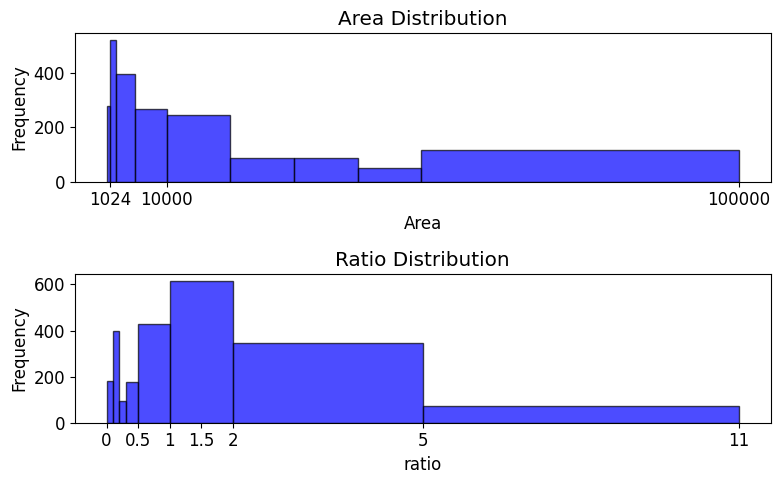

In [65]:
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 5.0) 
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['figure.dpi'] = 100
plt.figure()
area = []
ratio = []
for anno in load_json["annotations"]:
    area.append(round(anno["area"],2))
    ratio.append(round(anno["bbox"][2]/anno["bbox"][3],2))
area.sort()
ratio.sort()
plt.subplot(211)
plt.hist(area, bins=(500,1024,2000,5000,10000,20000,30000,40000,50000,100000),facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xticks((1024,10000,100000),(1024,10000,100000))
plt.xlabel("Area")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Area Distribution")
plt.subplot(212)
plt.hist(ratio, bins=(0,0.1,0.2,0.3,0.5,1,2,5,10),facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xticks((0,0.5,1,1.5,2,5,10),(0,0.5,1,1.5,2,5,11))
plt.xlabel("ratio")
plt.ylabel("Frequency")

# 显示图标题
plt.title("Ratio Distribution")
plt.tight_layout()#调整整体空白
# plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
plt.show()

### train-val split

In [1]:
import json
import numpy as np
import copy
np.random.seed(1)
json_path = "/home/dlsuncheng/Steel_Defect/Dataset/Annotation_num.json"
with open(json_path,'r') as load_f:
    load_json = json.load(load_f)
image_num = len(load_json["images"])
image_id_list = [i for i in range(1,image_num+1)]
all_list = dict(train=[],val=[])
np.random.shuffle(image_id_list)
split_point = image_num//5
all_list["val"].extend(image_id_list[:split_point])
all_list["train"].extend(image_id_list[split_point:])

In [38]:
for i in all_list:
    steel_defect_category = [{"id": 1, "name": "iron_oxide", "supercategory": "iron_oxide"}, 
        {"id": 2, "name": "cracked_skin", "supercategory": "cracked_skin"}, 
        {"id": 3, "name": "rolling_cycle", "supercategory": "rolling_cycle"}, 
        {"id": 4, "name": "slag_inclusion", "supercategory": "slag_inclusion"}, 
        {"id": 5, "name": "iron_gray", "supercategory": "iron_gray"}
        ]
    train_dict = {"images": [],
                    "type": "instances",
                    "annotations": [],
                    "categories": steel_defect_category}
    for images in load_json["images"]:
        if images["id"] in all_list[i]:
            train_dict["images"].append(images)
    for anno in load_json["annotations"]:
        if anno["image_id"] in all_list[i]:
            train_dict["annotations"].append(anno)
    with open(i+'_num.json', 'w') as fp:
      json.dump(train_dict, fp)

### check dataloader 

In [17]:
# Copyright (c) OpenMMLab. All rights reserved.

import numpy as np
from mmcv import Config, DictAction
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
cfg_path = "/home/dlsuncheng/Steel_Defect/model/FRCN_Baseline.py"
cfg = Config.fromfile(cfg_path)
cfg.gpu_ids = [1]
dataset = build_dataset(cfg.data.train)
print(dataset)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!

CocoDataset Train dataset with number of images 3112, and instance counts: 
+----------------+-------+------------------+-------+-------------------+-------+--------------------+-------+---------------+-------+
| category       | count | category         | count | category          | count | category           | count | category      | count |
+----------------+-------+------------------+-------+-------------------+-------+--------------------+-------+---------------+-------+
| 0 [iron_oxide] | 447   | 1 [cracked_skin] | 296   | 2 [rolling_cycle] | 288   | 3 [slag_inclusion] | 349   | 4 [iron_gray] | 474   |
|                |       |                  |       |                   |       |                    |       |               |       |
| -1 background  | 1657  |                  |       |                   |       |                    |       |               |       |
+----------------+-------+----

### check part dataset import 

In [3]:
import numpy as np
from mmcv import Config, DictAction
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
cfg_path = "/home/dlsuncheng/Steel_Defect/model/FRCN_baseline/FRCN_Baseline_part_dataset.py"
cfg = Config.fromfile(cfg_path)
cfg.gpu_ids = [1]
dataset = build_dataset(cfg.data.train)
print(dataset)

loading annotations into memory...
Done (t=0.18s)
creating index...
index created!

CocoDataset Train dataset with number of images 3112, and instance counts: 
+----------------+-------+------------------+-------+-------------------+-------+---------------+-------+----------+-------+
| category       | count | category         | count | category          | count | category      | count | category | count |
+----------------+-------+------------------+-------+-------------------+-------+---------------+-------+----------+-------+
|                |       |                  |       |                   |       |               |       |          |       |
| 0 [iron_oxide] | 447   | 1 [cracked_skin] | 296   | 2 [rolling_cycle] | 288   | -1 background | 2257  |          |       |
+----------------+-------+------------------+-------+-------------------+-------+---------------+-------+----------+-------+


### Image rename

In [8]:
# path = "/home/dlsuncheng/Dataset/Steel_Defect/Train_Val_num/"
path = "/home/dlsuncheng/Dataset/Steel_Defect/Test_num/"
import os
file_list = os.listdir(path)
file_list.sort()
rename_list = [str(index+3890).zfill(6) for index in range(len(file_list))]
for index in range(len(file_list)):
    print(file_list[index],rename_list[index]+file_list[index][-4:])    
    os.rename(path+file_list[index],path+rename_list[index]+file_list[index][-4:])

01263481_05_BF_00241.tif 003890.tif
01263705_03_BF_01060.jpg 003891.jpg
01263705_04_BF_01127.jpg 003892.jpg
01263705_04_BF_01416.jpg 003893.jpg
01263911_02_BF_00242.jpg 003894.jpg
01263911_02_BF_00245.jpg 003895.jpg
01263911_02_BF_00247.jpg 003896.jpg
01263911_03_BF_00237.jpg 003897.jpg
01263911_03_BF_00241.jpg 003898.jpg
01263911_03_BF_00248.jpg 003899.jpg
01264241_03_BF_00466.jpg 003900.jpg
01268234_04_BF_00541.jpg 003901.jpg
01270454_04_BF_00571.jpg 003902.jpg
01276588_02_BF_00555.jpg 003903.jpg
01279648_03_BF_04776.jpg 003904.jpg
01284663_09_BF_01195.jpg 003905.jpg
01285640_04_BF_01182.jpg 003906.jpg
Ch8DkGBX_diAAZ39AAA0rcxOwZ4030.jpg 003907.jpg
Ch8DkGBX_diABluBAAAhKi1L_VU431.jpg 003908.jpg
Ch8DkGBX_diAC8_lAAAbALi6o64843.jpg 003909.jpg
Ch8DkGBX_diAELsUAAAWzOVVAsI269.jpg 003910.jpg
Ch8DkGBX_diAEO7SAAAcRs2j6u4950.jpg 003911.jpg
Ch8DkGBX_diAEOA_AAApMZKeu6Y749.jpg 003912.jpg
Ch8DkGBX_diAG-sSAAAg0SLP0hs707.jpg 003913.jpg
Ch8DkGBX_diAGNdhAAAkCmXS3w8877.jpg 003914.jpg
Ch8DkGBX_diAGqgoAAAi

In [12]:
import json
json_path = "/home/dlsuncheng/Dataset/Steel_Defect/Annotation/test.json"

with open(json_path,'r') as load_f:
    load_json = json.load(load_f)
for image in load_json["images"]:
    _,filename = os.path.split(image["file_name"])
    index = file_list.index(filename)
    image["file_name"]=rename_list[index]+file_list[index][-4:]
    image["id"] = index+3890
with open('test_num.json', 'w') as fp:
    json.dump(load_json, fp)

### BBox Visualize

In [28]:
!python /home/dlsuncheng/Steel_Defect/SteelMMdet/tools/analysis_tools/data_visible.py \
    /home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/ \
    /home/dlsuncheng/Steel_Defect/Dataset/Annotation/Annotation_num.json \
    /home/dlsuncheng/Steel_Defect/Dataset/Train_Val_bbox/

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
  0%|                                                  | 0/3889 [00:00<?, ?it/s]/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000876.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/001247.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000526.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000485.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/001010.jpg
  0%|                                          | 5/3889 [00:00<01:31, 42.51it/s]/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000492.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000978.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000804.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000862.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/001044.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/000985.jpg
/home/dlsuncheng/Steel_Defect/Dataset/Train_Val_num/001017.jpg
 

In [26]:
import json
path = "/home/dlsuncheng/Steel_Defect/Dataset/Annotation/Annotation_num.json"
with open(path,"r") as load_f:
    load_json = json.load(load_f)
# [image for image in load_json["images"] if image["file_name"]=="001410.jpg"]
[anno for anno in load_json["annotations"] if anno["image_id"]==1352]

[{'segmentation': [[578.2, 4.0, 584.9, 4.0, 584.9, 127, 578.2, 127]],
  'area': 824.0999999999916,
  'bbox': [578.2, 4.0, 6.699999999999932, 123.0],
  'category_id': 4,
  'id': 1578,
  'image_id': 1352,
  'iscrowd': 0,
  'score': 0.5},
 {'segmentation': [[500.3, 11.0, 514.0, 11.0, 514.0, 124.0, 500.3, 124.0]],
  'area': 1548.0999999999988,
  'bbox': [500.3, 11.0, 13.699999999999989, 113.0],
  'category_id': 4,
  'id': 1579,
  'image_id': 1352,
  'iscrowd': 0,
  'score': 0.5}]

In [25]:
from pycocotools.coco import COCO
ann_file = "/home/dlsuncheng/Steel_Defect/Dataset/Annotation/Annotation_num.json"
coco = COCO(ann_file)
anno_ids = coco.getAnnIds(1352)
print(anno_ids)
# annos = coco.loadAnns(anno_ids)
# print(annos)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
[1578, 1579]


### Convert result to submit format

In [1]:
import json
test_result = "/home/dlsuncheng/Steel_Defect/Submit/FRCN_baseline_test_result.bbox.json"
blank_test = "/home/dlsuncheng/Steel_Defect/Dataset/Annotation/test.json"
result=[]
with open(test_result,'r') as load_f:
    test_json = json.load(load_f)
with open(blank_test,'r') as load_f:
    info_json = json.load(load_f)
for image in test_json:
    index = image["image_id"]
    _,image_name = os.path.split(info_json["images"][index]["file_name"])
    test_image_info = {'name':image_name,'category_id':image["category_id"],'bbox':[round(num,2) for num in image["bbox"]],'score':image["score"]}
    result.append(test_image_info)
with open('./Submit/result.json', 'w') as fp:
    json.dump(result, fp, indent=4, separators=(',', ': '))

### pseudo label from scratch

In [1]:
import json
submit_result = "/home/dlsuncheng/Steel_Defect/Submit/cascade_x101_test_result.json"
label_reuslt = "/home/dlsuncheng/Steel_Defect/Dataset/Annotation/train.json"
with open(submit_result,"r") as load_f:
    submit_json = json.load(load_f)
with open(label_reuslt,"r") as load_f:
    label_json = json.load(load_f)

In [3]:
print()

[{'name': 'CqQ9DGAQ-biADOubAAAYr_lpc6I444.jpg',
  'category_id': 3,
  'bbox': [485.45, 1.99, 38.67, 93.13],
  'score': 0.9971960783004761},
 {'name': 'CqQ9DF_pfpCAIpWiAAAjxTuAGKo392.jpg',
  'category_id': 5,
  'bbox': [634.35, 47.62, 32.19, 31.85],
  'score': 0.9979484677314758},
 {'name': 'CqQ9DF_pfpCAIpWiAAAjxTuAGKo392.jpg',
  'category_id': 5,
  'bbox': [105.27, 60.14, 17.77, 15.43],
  'score': 0.950035572052002},
 {'name': 'CqQ9DGAQ_R2ACGSKAAAwjXES8MY036.jpg',
  'category_id': 2,
  'bbox': [249.54, 2.57, 11.51, 124.76],
  'score': 0.9857871532440186},
 {'name': 'CqQ9DGAQ-biANAAmAAAY4uaJ8jM698.jpg',
  'category_id': 4,
  'bbox': [345.18, 27.81, 21.07, 97.33],
  'score': 0.9957699179649353},
 {'name': 'CqQ9DF_pf8uAZf-xAAArnRnIW9Y959.jpg',
  'category_id': 1,
  'bbox': [356.14, 3.42, 120.52, 120.74],
  'score': 0.9267962574958801},
 {'name': 'CqQ9DF_pf8uAZf-xAAArnRnIW9Y959.jpg',
  'category_id': 1,
  'bbox': [242.27, 1.47, 239.27, 124.41],
  'score': 0.9192821979522705},
 {'name': 'Cq

In [13]:
import pandas as pd
filelist=pd.DataFrame(file_list)
# filelist[]

['01263481_05_BF_00241.tif', '01263705_03_BF_01060.jpg', '01263705_04_BF_01127.jpg', '01263705_04_BF_01416.jpg', '01263911_02_BF_00242.jpg', '01263911_02_BF_00245.jpg', '01263911_02_BF_00247.jpg', '01263911_03_BF_00237.jpg', '01263911_03_BF_00241.jpg', '01263911_03_BF_00248.jpg', '01264241_03_BF_00466.jpg', '01268234_04_BF_00541.jpg', '01270454_04_BF_00571.jpg', '01276588_02_BF_00555.jpg', '01279648_03_BF_04776.jpg', '01284663_09_BF_01195.jpg', '01285640_04_BF_01182.jpg', 'Ch8DkGBX_diAAZ39AAA0rcxOwZ4030.jpg', 'Ch8DkGBX_diABluBAAAhKi1L_VU431.jpg', 'Ch8DkGBX_diAC8_lAAAbALi6o64843.jpg', 'Ch8DkGBX_diAELsUAAAWzOVVAsI269.jpg', 'Ch8DkGBX_diAEO7SAAAcRs2j6u4950.jpg', 'Ch8DkGBX_diAEOA_AAApMZKeu6Y749.jpg', 'Ch8DkGBX_diAG-sSAAAg0SLP0hs707.jpg', 'Ch8DkGBX_diAGNdhAAAkCmXS3w8877.jpg', 'Ch8DkGBX_diAGqgoAAAi2q2nq1w471.jpg', 'Ch8DkGBX_diAHesOAAAfkT9O-PQ386.jpg', 'Ch8DkGBX_diAJKRGAAAZoNU5YQ4983.jpg', 'Ch8DkGBX_diAJia_AAAgYwaxA7s638.jpg', 'Ch8DkGBX_diAKXZnAAAmSgHPmNE750.jpg', 'Ch8DkGBX_diAN2Q0AAAzHoD-O1I8